# <center> Setup </center>


In [114]:
# For showing output for every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 
# Let's read all the data!
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Based on this information, the survival rate in the train data set is 38%. 
And also, we have some missing values based on the count, because count exclude the NaN values 

In [115]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 This tells the data types and the features

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [117]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# <center> Exploratory Analysis </center>
## Missing Values
Let's figure out the missing values  
Cabin, Age, and Embarked are the main target

## Feature Analysis 

In [118]:
# Percentage of missing value 
percent = (train_df.isnull().mean().sort_values(ascending=False) * 100 ).map(lambda x: '%.2f' % x)
# Total count of missing value 
total = train_df.isnull().sum().sort_values(ascending=False)
# df of missing value 
missing_data = pd.concat([total,percent],axis=1, keys=['Total','%'])
missing_data

,Total,%
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


Investigate:
- Age
- Embarked
- Fare
- Sex
- Parch/SibSp
- Pclass

Exclude:
- Ticket
- Name
- PassengerId
- Cabin 

Age

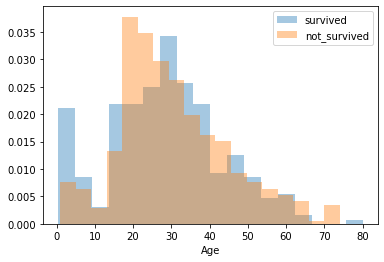

In [122]:
# Let's double check the missing values
# missing_data.loc['Age']
# Create a age data frame with dropped na 
age = train_df.dropna(subset=['Age'])
# Parameter to simplify graph later
survived = age['Survived']==1
not_survived = age['Survived']==0
men = age['Sex']=='male'
women = age['Sex']=='female'
# Plot age distribution for survival
sns.distplot(age[survived]['Age'], bins=18, kde=False, norm_hist = True, hist= True, label = 'survived')
sns.distplot(age[not_survived]['Age'], bins=18, kde=False, norm_hist = True, hist = True, label = 'not_survived')
plt.legend()

In [123]:
# 